<a href="https://colab.research.google.com/github/mamun216/testrepo/blob/master/Chipotle_data_analysis_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

# Context

Chipotle is one of the most popular fast-casual restaurant chains in the United States, and I personally enjoy eating there quite a bit. I wanted to work on my data scrapping and geospatial analysis skills, and I thought this would be a fun dataset to do it with!

# Content

Location of every Chipotle Restaurant within the United States.
state
location
address
latitude
longitude

# Acknowledgements

I downloaded this data data from kaggle website.

## Inspiration

Maybe we can get our hands on some US population data and identify areas that are likely able to sustain a new Chipotle Location?


# Step 1. Import the necessary libraries

In [21]:
import numpy as np
import pandas as pd
import os
os.listdir()

['.config', 'data_chipotle.tsv', 'data_chipotle (1).tsv', 'sample_data']

# Step 2: Import datasets and assign to a variable name chipo

In [22]:
from google.colab import files
uploaded= files.upload()
chipo=pd.read_csv("data_chipotle.tsv", sep='\t')
chipo.head()

Saving data_chipotle.tsv to data_chipotle (2).tsv


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


# Step 3: see the first 10 entries

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


# Step 4: What is the number of observations in the datasets?

In [ ]:
chipo.shape[0]

4622

In [ ]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### The datasets has 4622 observations and 5 columns.

# Step 5: What is the number of columns in dataset?

In [ ]:
chipo.shape[1]

5

# Step 6: Print the name of all columns

In [ ]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

# Step 7: How is the dataset indexed?

In [ ]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

# Step 8: Which was the most ordered item?

In [ ]:
most_ordered_item= chipo.groupby('item_name').sum()
most_ordered_item=most_ordered_item.sort_values(['quantity'], ascending = False)
most_ordered_item.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


# Step 9. What was the most ordered item in the choice_description column?

In [ ]:
most_ordered_item1= chipo.groupby('choice_description').sum()
most_ordered_item1=most_ordered_item1.sort_values(['quantity'], ascending = False)
most_ordered_item1.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


# Step 10. How many items were orderd in total?

In [ ]:
total_items_ordered= chipo.quantity.sum()
total_items_ordered

4972

# Step 11. Turn the item price into a float

### Step 11.a. Check the item price type

In [16]:
chipo.item_price.dtype

dtype('float64')

# Step 11.b. Remove dollar sign from clumn and convert to float as datatype

In [23]:
chipo['item_price'] = chipo['item_price'].replace({'\$' :'', ',':''}, regex=True).astype(float)

In [26]:
chipo.item_price.dtype

dtype('float64')

# Step 12. How much was the revenue for the period in the dataset?

In [27]:
revenue = (chipo['quantity']* chipo['item_price']).sum()

print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


# Step 13. How many orders were made in the period?

In [28]:
orders= chipo.order_id.value_counts().count()
orders

1834

# Step 14. What is the average revenue amount per order?

In [29]:
# Solution 1

chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

In [30]:
# Solution 2

chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.394231188658654

# Step 15. How many different items are sold?

In [31]:
chipo.item_name.value_counts().count()

50

# Step 16: Delete the duplicates on item name and quantity?

In [34]:
chipo_filtered= chipo.drop_duplicates(['item_name', 'quantity', 'choice_description'])
chipo_filtered.head()

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [36]:
# select only the products with quantity equals to 1
chipo_one_prod = chipo_filtered[chipo_filtered.quantity == 1]
chipo_one_prod.head()


,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98


# step 17: Show the name of item which quantity is 1 and price is more than 10 which is unique

In [37]:
chipo_one_prod[chipo_one_prod['item_price']>10].item_name.nunique()

25

# Step 18: Items price more than 10 in price

In [38]:
chipo_one_prod[chipo_one_prod['item_price']>10]


,order_id,quantity,item_name,choice_description,item_price,revenue
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98,10.98
39,19,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75,11.75
...,...,...,...,...,...,...
4593,1825,1,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Rice, Sour Cream, ...",11.75,11.75
4594,1825,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Pinto Beans, Sour ...",11.75,11.75
4607,1829,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, S...",11.75,11.75
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75


# Step 19: What is the price of each item?


In [43]:
# delete the duplicates in item_name and quantity
chipo_filtered = chipo.drop_duplicates(['item_name','quantity'])
chipo[(chipo['item_name'] == 'Chicken Bowl') & (chipo['quantity'] == 1)]

,order_id,quantity,item_name,choice_description,item_price,revenue
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75,8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49,8.49
42,20,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25,11.25
...,...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25,11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75,8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75,8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75,8.75


In [44]:
# select only the products with quantity equals to 1

chipo_one_prod = chipo_filtered[chipo_filtered.quantity == 1]

In [45]:
# select only the item_name and item_price columns

price_per_item = chipo_one_prod[['item_name', 'item_price']]


In [47]:
# sort the values from the most to less expensive

price_per_item.sort_values(by = "item_price", ascending = False).head(10)

,item_name,item_price
606,Steak Salad Bowl,11.89
1229,Barbacoa Salad Bowl,11.89
1132,Carnitas Salad Bowl,11.89
7,Steak Burrito,11.75
168,Barbacoa Crispy Tacos,11.75
39,Barbacoa Bowl,11.75
738,Veggie Soft Tacos,11.25
186,Veggie Salad Bowl,11.25
62,Veggie Bowl,11.25
57,Veggie Burrito,11.25


# Step 20: Sort by the name of items?

In [49]:
chipo.sort_values(by = "item_name").head(10)

,order_id,quantity,item_name,choice_description,item_price,revenue
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98,25.96
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49,6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49,6.49
3422,1373,1,6 Pack Soft Drink,[Coke],6.49,6.49
553,230,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
1916,774,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
1922,776,1,6 Pack Soft Drink,[Coke],6.49,6.49
1937,784,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49


# Step 21: What was the quantity of the most expensive item ordered?

In [50]:
chipo.sort_values(by = "item_price", ascending = False).head(1)

,order_id,quantity,item_name,choice_description,item_price,revenue
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75


## Step 22: How many times was a Veggie Salad Bowl ordered?

In [52]:
veggie_salad= chipo[chipo.item_name=='Veggie Salad Bowl']
len(veggie_salad)

18

# Step 23: How many times did someone order more than one Canned Soda?

In [53]:
chipo_drink = chipo[(chipo.item_name == "Canned Soda") & (chipo.quantity > 1)]
len(chipo_drink)

20

# Visualization

In [62]:
import matplotlib.pyplot as plt
from collections import Counter

# set this so the 
%matplotlib inline

# Step 24 : create a histogram on top five items bought

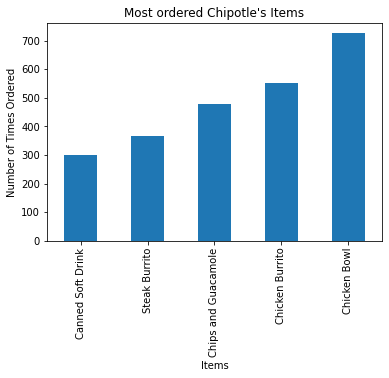

In [69]:
# get the Series of the names
x = chipo.item_name

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = True)[45:50]

# create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()

# Step 25 . Create a scatterplot with the number of items orderered per order price

Text(0.5, 1.0, 'Number of items ordered per order price')

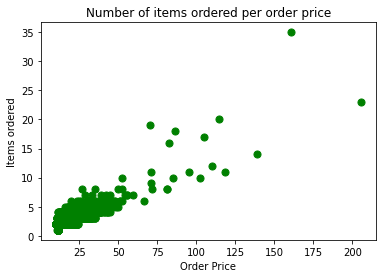

In [73]:
# groupby the orders and sum
orders = chipo.groupby('order_id').sum()

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')